## Observations and Insights 

In [217]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
merge_df.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mice_count = len(pd.unique(merge_df['Mouse ID']))
mice_count

249

In [3]:
# Finding the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_row_idx = merge_df.duplicated(['Mouse ID', 'Timepoint'])
duplicate_row = merge_df[duplicate_row_idx]
duplicate_mouse = duplicate_row['Mouse ID'].unique()[0]
duplicate_mouse

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_row_index = merge_df['Mouse ID'] == duplicate_mouse
merge_df.loc[duplicate_mouse_row_index] 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.loc[duplicate_mouse_row_index == False] 

In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(pd.unique(clean_df['Mouse ID']))
mice_count

248

## Summary Statistics

In [7]:
# Value Counts for each Drug Regimen
clean_df['Drug Regimen'].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
clean_df_drugreg = clean_df.groupby('Drug Regimen')
tumor_volume = clean_df_drugreg['Tumor Volume (mm3)']

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Summary Stats Variables
mean_tv = tumor_volume.mean()
median_tv = tumor_volume.median()
variance_tv = tumor_volume.var()
sd_tv = tumor_volume.std()
sem_tv = tumor_volume.sem()

# Assemble the resulting series into a single summary dataframe.
tv_summary_df = pd.DataFrame({
    'mean': mean_tv,
    'median': median_tv,
    'var': variance_tv,
    'std': sd_tv,
    'sem': sem_tv,
    })

# Print
tv_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
clean_df_drugreg.agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})

# functions = ['mean','median','var','std','sem']
# column_functions = {'Tumor Volume (mm3)': functions}
# clean_df_drugreg.agg(column_functions)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

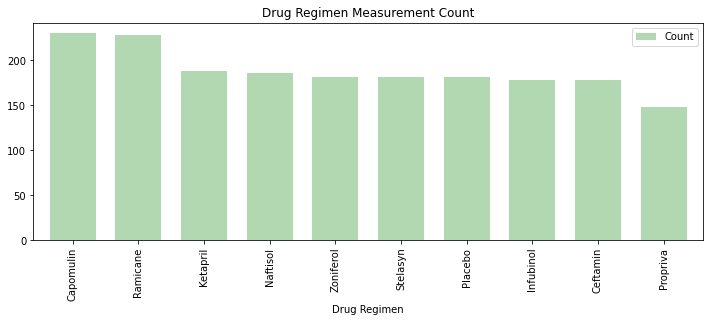

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Value Counts for each Drug Regimen
tot_measure_dr = clean_df['Drug Regimen']
tot_measure_dr_df = pd.DataFrame(tot_measure_dr)
tot_measure_dr_df = tot_measure_dr_df.value_counts().rename_axis('Drug Regimen').reset_index(name='Count')
tot_measure_dr_x = tot_measure_dr_df.iloc[:,0]
tot_measure_dr_y = tot_measure_dr_df.iloc[:,1]

#Bar plot with Pandas
tot_measure_dr_df.plot(kind = 'bar', x='Drug Regimen', y='Count', title='Drug Regimen Measurement Count', figsize = (12,4), width = .7, color='g', alpha=0.3, align="center")
plt.show()

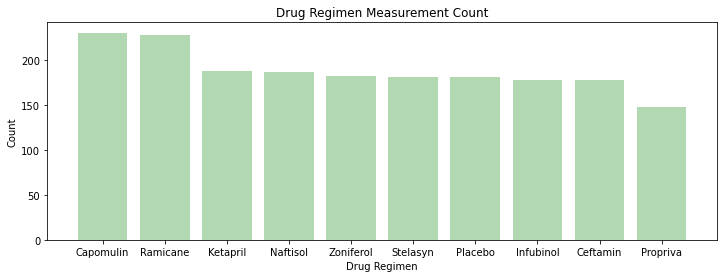

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# tot_measure_dr_df
#Bar plot with Pyplot
plt.figure(figsize = (12,4))
plt.bar(tot_measure_dr_x, tot_measure_dr_y, color='g', alpha=0.3, align='center')
plt.plot()
plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.title('Drug Regimen Measurement Count')
plt.show()

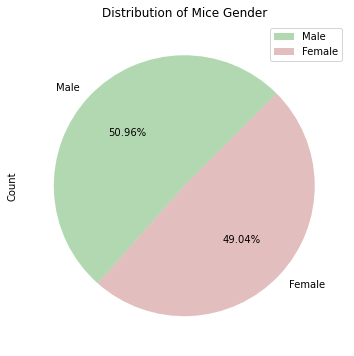

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count = clean_df['Sex']
gender_count_df = pd.DataFrame(gender_count)
gender_count_df = gender_count_df.value_counts().reset_index(name='Count')
gender_count_df

gender_count_df.plot(kind='pie', startangle=45, figsize=(12,6), autopct='%.2f%%', colors=['green', 'brown'], wedgeprops={'alpha':0.3}, y='Count', labels =['Male','Female'], title='Distribution of Mice Gender')
plt.show()

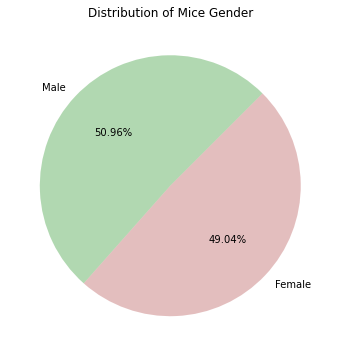

In [284]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# PYPLOT
gender_count = clean_df['Sex']
gender_count_df = pd.DataFrame(gender_count)
gender_count_df_noindex = gender_count_df.value_counts()
gender_count_df_noindex

fig = plt.figure(figsize = (12,6))
plt.pie(gender_count_df_noindex, labels=['Male', 'Female'], startangle=45, autopct='%.2f%%', colors=['green','brown'], wedgeprops={'alpha':0.3})
plt.title('Distribution of Mice Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [292]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_tx = clean_df[(clean_df['Drug Regimen'] == 'Capomulin')|(clean_df['Drug Regimen'] == 'Ramicane')|(clean_df['Drug Regimen'] == 'Infubinol')|(clean_df['Drug Regimen'] == 'Ceftamin')]
last_time = pd.DataFrame()
mouse_id = four_tx.groupby(['Mouse ID'])
last_time['last_timepoint'] = mouse_id['Timepoint'].max()
last_time

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = last_time.merge(clean_df,how='left',on='Mouse ID')
final_merge = merged_df[['Mouse ID','Tumor Volume (mm3)','Drug Regimen','Timepoint']].loc[merged_df['last_timepoint'] == merged_df['Timepoint']]
# final_merged_df
final_merge

,Mouse ID,Tumor Volume (mm3),Drug Regimen,Timepoint
9,a203,67.973419,Infubinol,45
19,a251,65.525743,Infubinol,45
29,a275,62.999356,Ceftamin,45
39,a411,38.407618,Ramicane,45
49,a444,43.047543,Ramicane,45
...,...,...,...,...
773,y769,68.594745,Ceftamin,45
783,y793,31.896238,Capomulin,45
793,y865,64.729837,Ceftamin,45
803,z578,30.638696,Ramicane,45


In [254]:
# Put treatments into a list for for loop (and later for plot labels)
# for row in final_merge['Drug Regimen']:
#     print(row)


# tx_list = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']
# for row in tx_list:
#     print(row)

# Create empty list to fill with tumor vol data (for plotting)
# tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin
Ramicane
Ketapril
Naftisol
Zoniferol
Stelasyn
Placebo
Infubinol
Ceftamin
Propriva


In [252]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
